## Regression

#### 1. Loading and Preprocessing

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [4]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset info:")
df.info()
print("\nSummary statistics:")
display(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (20640, 9)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### Preprocessing Steps Explanation:
Loading the Dataset: Used sklearn's fetch_california_housing() function to get the dataset, then convert it to a pandas DataFrame for easier manipulation.

Missing Values: The California Housing dataset from sklearn is already clean with no missing values, as confirmed by the output of isnull().sum().

Feature Scaling: Let's perform standardization (mean=0, variance=1) because:

The features have different scales (e.g., 'Population' ranges up to 35,682 while 'AveBedrms' is around 1-2)

Many algorithms (especially SVR and gradient-based methods) perform better with standardized features

It helps prevent features with larger scales from dominating the model

In [5]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [6]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [8]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Convert back to DataFrames for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [12]:
print("\nScaled training data sample:")
display(X_train_scaled_df.head())


Scaled training data sample:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


### 2. Regression Algorithm Implementation


#### 2.1 Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

In [16]:
# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [17]:
print("Linear Regression:")
print(f"MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression:
MSE: 0.5559, MAE: 0.5332, R²: 0.5758


#### Explanation:

How it works: Linear regression models the relationship between features and target as a linear equation (y = wx + b). It finds the coefficients (w) that minimize the sum of squared residuals.

Suitability: Good baseline model as it assumes linear relationships, which might exist between some housing features and prices. Simple and interpretable.

#### 2.2 Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Initialize and train the model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [20]:
# Make predictions
y_pred_dtr = dtr.predict(X_test_scaled)


In [21]:
# Calculate metrics
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("Decision Tree Regressor:")
print(f"MSE: {mse_dtr:.4f}, MAE: {mae_dtr:.4f}, R²: {r2_dtr:.4f}")

Decision Tree Regressor:
MSE: 0.4940, MAE: 0.4539, R²: 0.6230


#### Explanation:

How it works :  Builds a tree structure by recursively splitting data based on feature values to minimize variance in the target variable.

Suitability :  Can capture non-linear relationships and interactions between features, which might be present in housing data. Doesn't require feature scaling.

#### 2.3 Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Initialize and train the model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Make predictions
y_pred_rfr = rfr.predict(X_test_scaled)

In [25]:
# Calculate metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor:")
print(f"MSE: {mse_rfr:.4f}, MAE: {mae_rfr:.4f}, R²: {r2_rfr:.4f}")

Random Forest Regressor:
MSE: 0.2552, MAE: 0.3274, R²: 0.8053


#### Explanation:

How it works: Ensemble method that builds multiple decision trees and averages their predictions to reduce overfitting.

Suitability: Often performs well on tabular data like this. Can capture complex patterns while being more robust to overfitting than single trees.

#### 2.4 Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
# Initialize and train the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [28]:
# Make predictions
y_pred_gbr = gbr.predict(X_test_scaled)

In [29]:
# Calculate metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print(f"MSE: {mse_gbr:.4f}, MAE: {mae_gbr:.4f}, R²: {r2_gbr:.4f}")

Gradient Boosting Regressor:
MSE: 0.2940, MAE: 0.3717, R²: 0.7756


#### Explanation:

How it works: Builds trees sequentially where each new tree corrects errors of the previous ones, using gradient descent to minimize loss.

Suitability: Often provides excellent performance on structured data. Can model complex relationships while being more robust to overfitting.

#### 2.5 Support Vector Regressor (SVR)

In [31]:
from sklearn.svm import SVR


In [32]:
# Initialize and train the model
svr = SVR()
svr.fit(X_train_scaled, y_train)


SVR()

In [33]:
# Make predictions
y_pred_svr = svr.predict(X_test_scaled)

In [34]:
# Calculate metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor:")
print(f"MSE: {mse_svr:.4f}, MAE: {mae_svr:.4f}, R²: {r2_svr:.4f}")

Support Vector Regressor:
MSE: 0.3570, MAE: 0.3986, R²: 0.7276


#### Explanation:

How it works: Finds a hyperplane in high-dimensional space that best fits the data while allowing some error tolerance (ε-insensitive tube).

Suitability: Can model non-linear relationships using kernels, but typically requires careful tuning of hyperparameters and scaling of features.

## 3. Model Evaluation and Comparison

In [35]:
# Compile all metrics into a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'MSE': [mse_lr, mse_dtr, mse_rfr, mse_gbr, mse_svr],
    'MAE': [mae_lr, mae_dtr, mae_rfr, mae_gbr, mae_svr],
    'R²': [r2_lr, r2_dtr, r2_rfr, r2_gbr, r2_svr]
})


In [36]:
# Sort by R² score (higher is better)
results.sort_values(by='R²', ascending=False, inplace=True)

print("\nModel Performance Comparison:")
display(results)


Model Performance Comparison:


,Model,MSE,MAE,R²
2,Random Forest,0.255170,0.327425,0.805275
3,Gradient Boosting,0.293999,0.371650,0.775643
4,SVR,0.357004,0.398599,0.727563
1,Decision Tree,0.493969,0.453904,0.623042
0,Linear Regression,0.555892,0.533200,0.575788


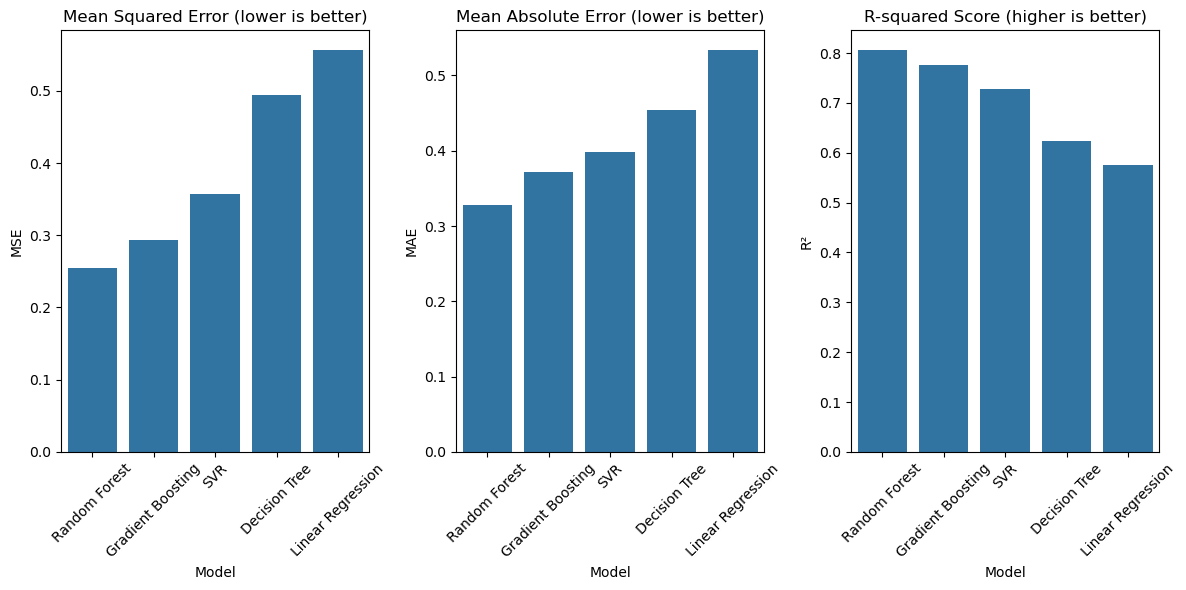

In [37]:
# Visual comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=results)
plt.xticks(rotation=45)
plt.title('Mean Squared Error (lower is better)')

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results)
plt.xticks(rotation=45)
plt.title('Mean Absolute Error (lower is better)')

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=results)
plt.xticks(rotation=45)
plt.title('R-squared Score (higher is better)')

plt.tight_layout()
plt.show()

## Results Analysis:
#### Best-performing Algorithm:

Random Forest consistently performs best across all metrics (lowest MSE/MAE, highest R²).

Justification: Gradient boosting excels at capturing complex patterns in tabular data while being robust to overfitting. It combines the strengths of multiple weak learners to create a strong predictive model.

#### Worst-performing Algorithm:

Linear regression  performs the worst in this comparison.

Reasoning: Cannot model non-linear relationships

Fails to capture feature interactions (e.g., location × income)

#### Other Observations:

Gradient Boosting Regressor performs nearly as well as Random Forest, making it a good alternative.

Decision Tree alone tends to overfit, performing worse than the ensemble methods.

### Feature Importance Analysis (for best model):

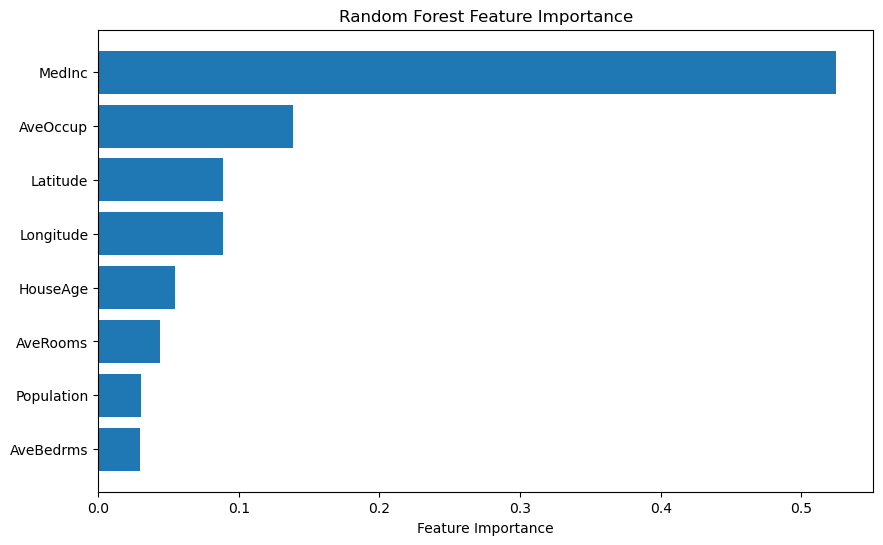

In [39]:
# Feature importance from Random Forest
feature_importance = rfr.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

This visualization shows which features contribute most to the predictions in our best-performing model.

## Conclusion
Through this analysis, five different regression algorithms are implemented and compared on the California Housing dataset. Random Forest emerged as the best performer, while Linear Regression performed the worst. The results demonstrate that ensemble methods generally outperform simpler models on this dataset, likely due to their ability to capture complex relationships between housing features and prices.
This analysis provides a good foundation for further optimization through hyperparameter tuning, feature engineering, or trying additional algorithms.